In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter
import re

In [2]:
run_path = '../'
test_name = 'taylorgreen'
test_path = os.path.join(run_path, test_name)

In [3]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
analyser = RunAnalyser(runs, test_path)

<Figure size 700x700 with 0 Axes>

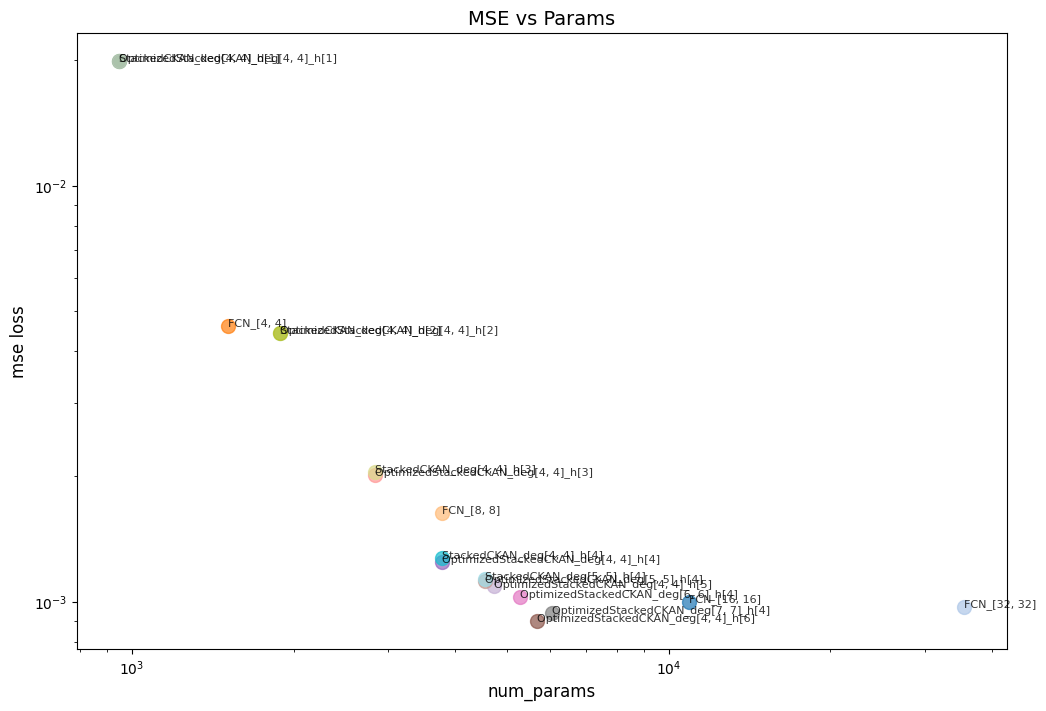

In [4]:
analyser.plot_mse_over_params()

<Figure size 700x700 with 0 Axes>

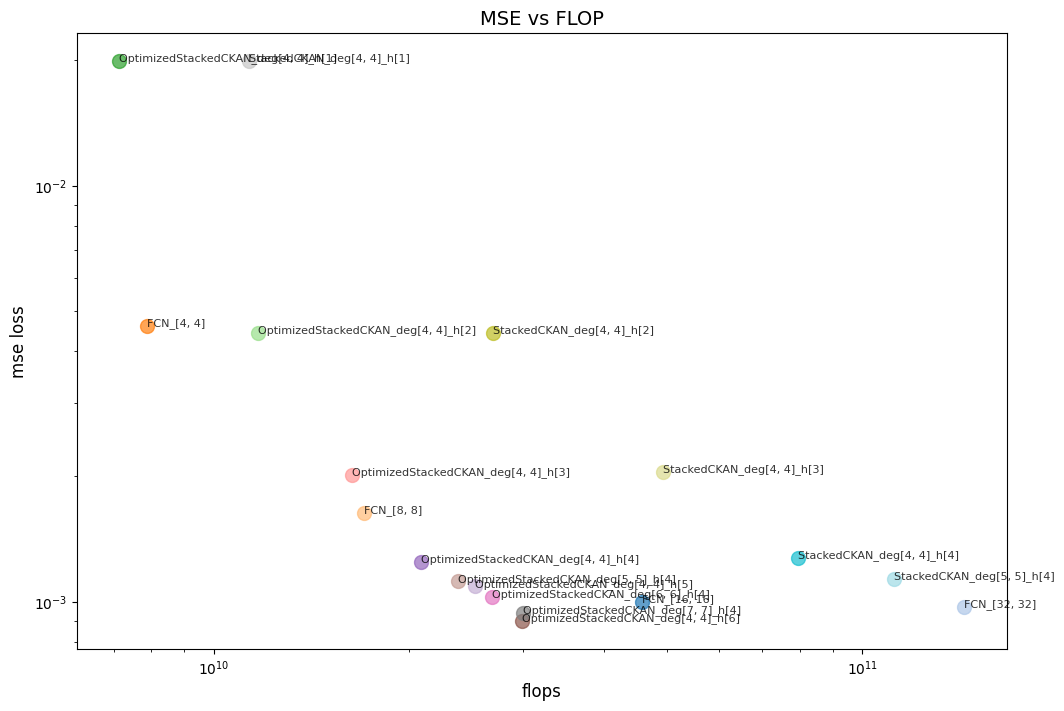

In [5]:
analyser.plot_mse_over_flops()

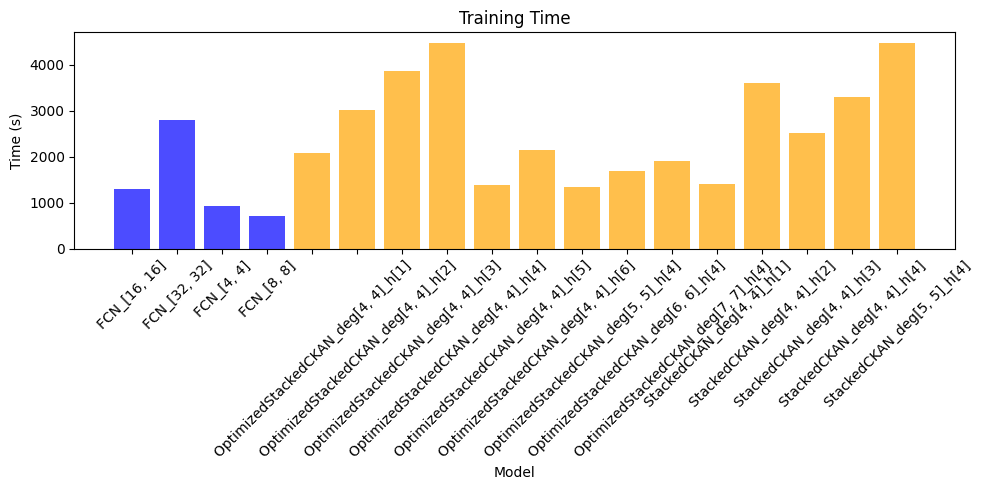

In [6]:
analyser.plot_training_times(filter=lambda x: 'Stacked' in x or 'FCN' in x)

<Figure size 700x700 with 0 Axes>

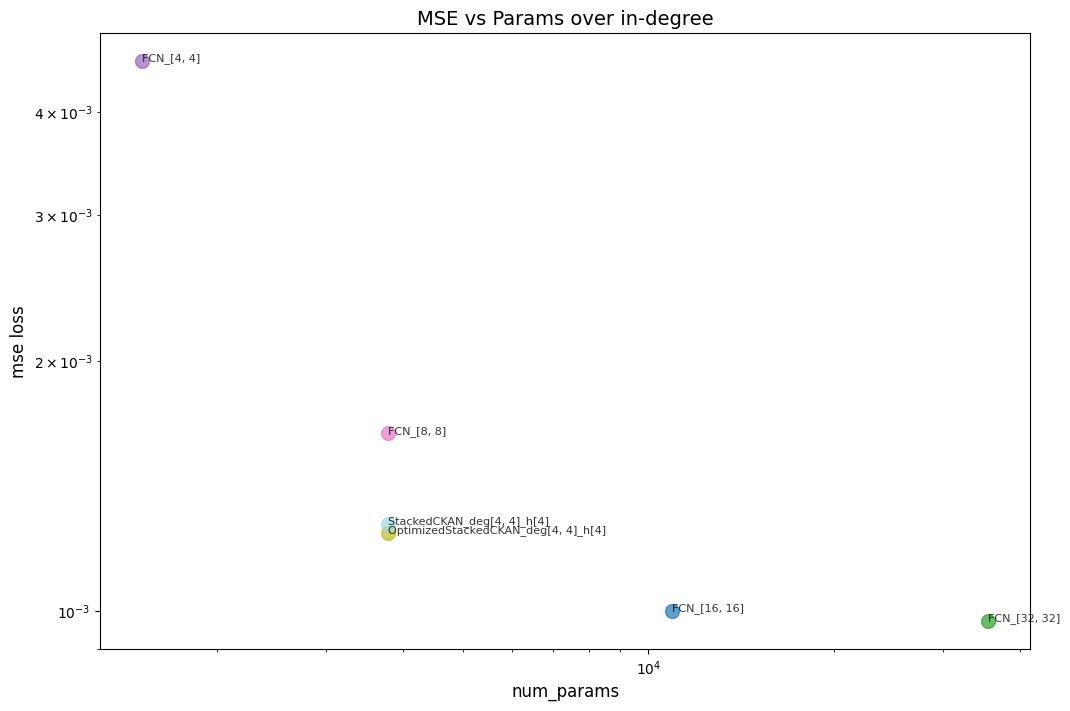

In [7]:
analyser.plot_mse_over_params(filter=lambda x: 'StackedCKAN_deg[' in x and ' 4]_h[4]' in x or 'FCN' in x, title='MSE vs Params over in-degree')

<Figure size 700x700 with 0 Axes>

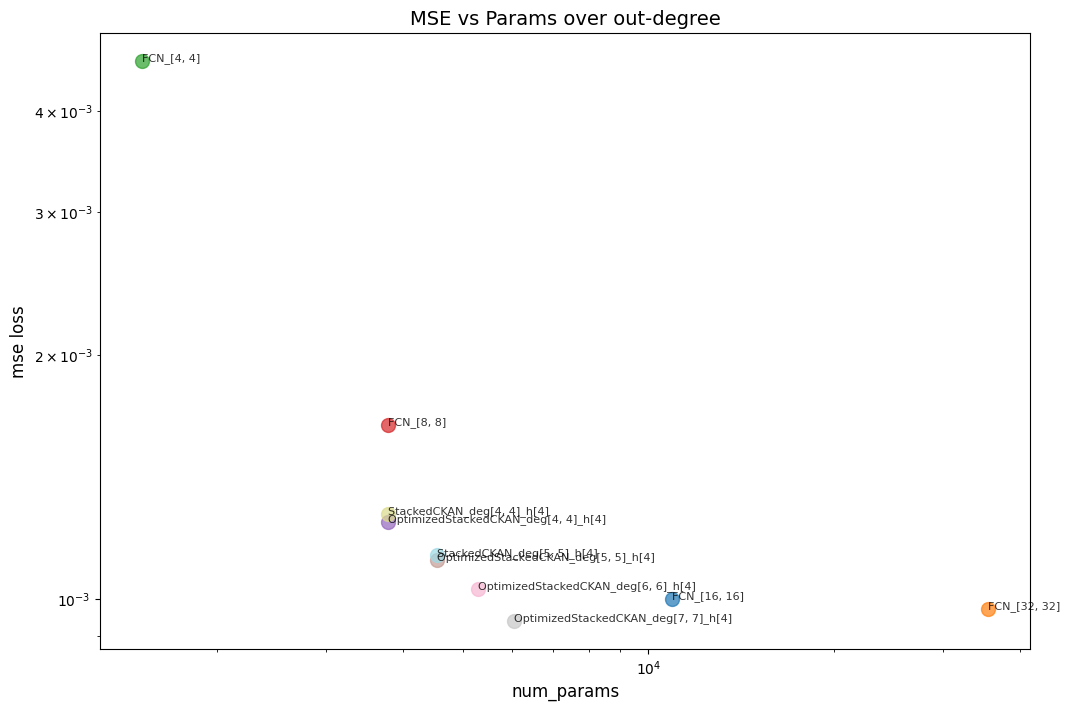

In [8]:
analyser.plot_mse_over_params(filter=lambda x: 'StackedCKAN_deg[' in x and ']_h[4]' in x or 'FCN' in x, title='MSE vs Params over out-degree')

<>:1: SyntaxWarning: invalid escape sequence '\['
<>:1: SyntaxWarning: invalid escape sequence '\['
/tmp/ipykernel_1101266/4148977264.py:1: SyntaxWarning: invalid escape sequence '\['
  analyser.plot_mse_over_params(filter=lambda x: re.match('OptimizedStackedCKAN_deg\[4, 4]_h\[[0-9]]', x), title='Varying hidden dimensions', noshow=True)


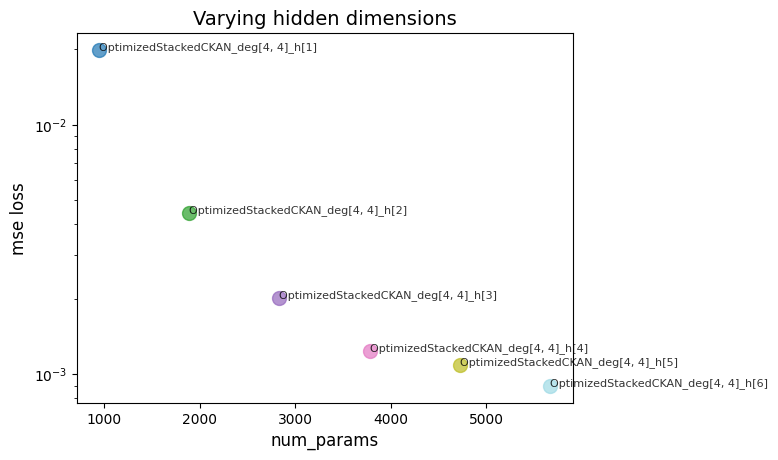

In [9]:
analyser.plot_mse_over_params(filter=lambda x: re.match('OptimizedStackedCKAN_deg\[4, 4]_h\[[0-9]]', x), title='Varying hidden dimensions', noshow=True)
plt.xscale('linear')


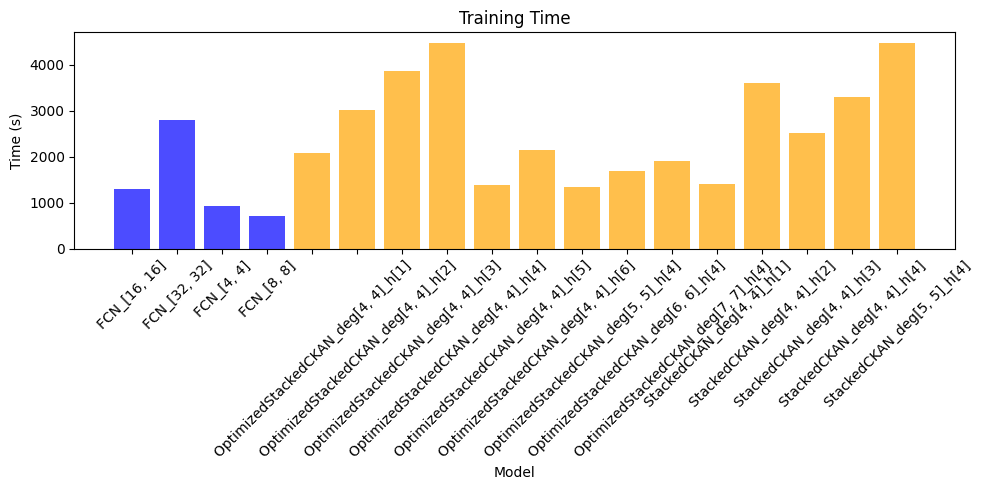

In [10]:
analyser.plot_training_times()

<>:1: SyntaxWarning: invalid escape sequence '\['
<>:1: SyntaxWarning: invalid escape sequence '\['
<>:1: SyntaxWarning: invalid escape sequence '\['
<>:1: SyntaxWarning: invalid escape sequence '\['
/tmp/ipykernel_1101266/335541235.py:1: SyntaxWarning: invalid escape sequence '\['
  analyser.plot_mse_over_params(filter=lambda x: re.match('OptimizedStackedCKAN_deg\[4, 4]_h\[(?!1\])\d+]', x) or re.match('FCN_\[[0-9]*, [0-9]*]', x), title='Varying hidden dimensions', noshow=True)
/tmp/ipykernel_1101266/335541235.py:1: SyntaxWarning: invalid escape sequence '\['
  analyser.plot_mse_over_params(filter=lambda x: re.match('OptimizedStackedCKAN_deg\[4, 4]_h\[(?!1\])\d+]', x) or re.match('FCN_\[[0-9]*, [0-9]*]', x), title='Varying hidden dimensions', noshow=True)


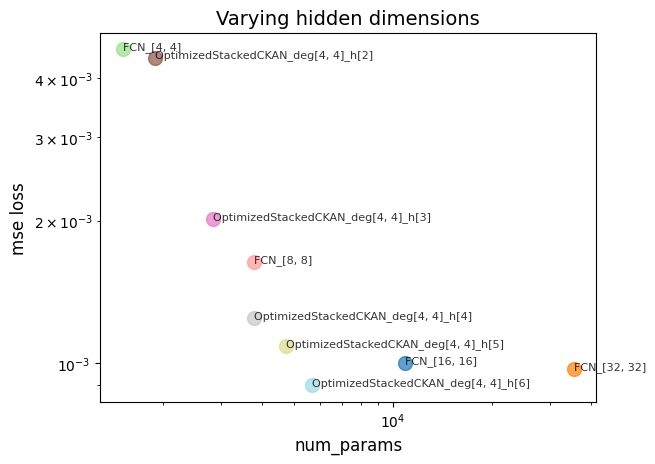

In [ ]:
plt.figure(figsize=(10, 5))
analyser.plot_mse_over_params(filter=lambda x: re.match('OptimizedStackedCKAN_deg\[[0-9], [0-9]]_h\[4]', x) or re.match('FCN_\[[0-9]*, [0-9]*]', x), title='Varying polynomial degree', noshow=True)
analyser.plot_mse_over_params(filter=lambda x: re.match('OptimizedStackedCKAN_deg\[4, 4]_h\[(?!1\])\d+]', x) or re.match('FCN_\[[0-9]*, [0-9]*]', x), title='Varying hidden dimensions', noshow=True)
# plt.xscale('linear')

<>:1: SyntaxWarning: invalid escape sequence '\['
<>:1: SyntaxWarning: invalid escape sequence '\['
<>:1: SyntaxWarning: invalid escape sequence '\['
<>:1: SyntaxWarning: invalid escape sequence '\['
/tmp/ipykernel_1101266/2602071230.py:1: SyntaxWarning: invalid escape sequence '\['
  analyser.plot_mse_over_params(filter=lambda x: re.match('OptimizedStackedCKAN_deg\[[0-9], [0-9]]_h\[4]', x) or re.match('FCN_\[[0-9]*, [0-9]*]', x), title='Varying hidden dimensions', noshow=True)
/tmp/ipykernel_1101266/2602071230.py:1: SyntaxWarning: invalid escape sequence '\['
  analyser.plot_mse_over_params(filter=lambda x: re.match('OptimizedStackedCKAN_deg\[[0-9], [0-9]]_h\[4]', x) or re.match('FCN_\[[0-9]*, [0-9]*]', x), title='Varying hidden dimensions', noshow=True)


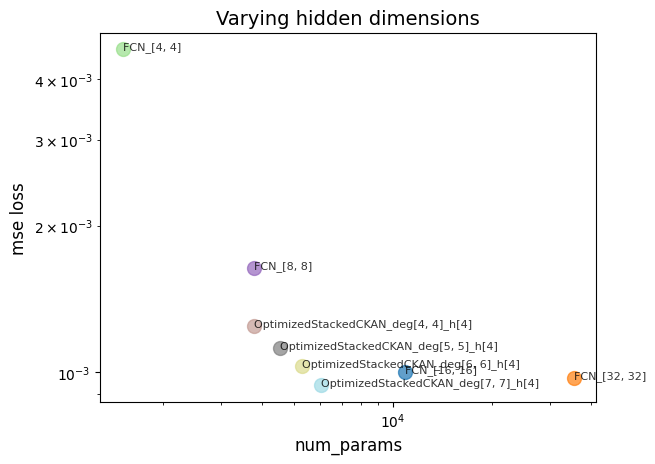

In [ ]:
# # plt.xscale('linear')